In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²) score: {r2}")

Mean Squared Error (MSE): 0.17104527280850101
R-squared (R²) score: 0.25500281176741757


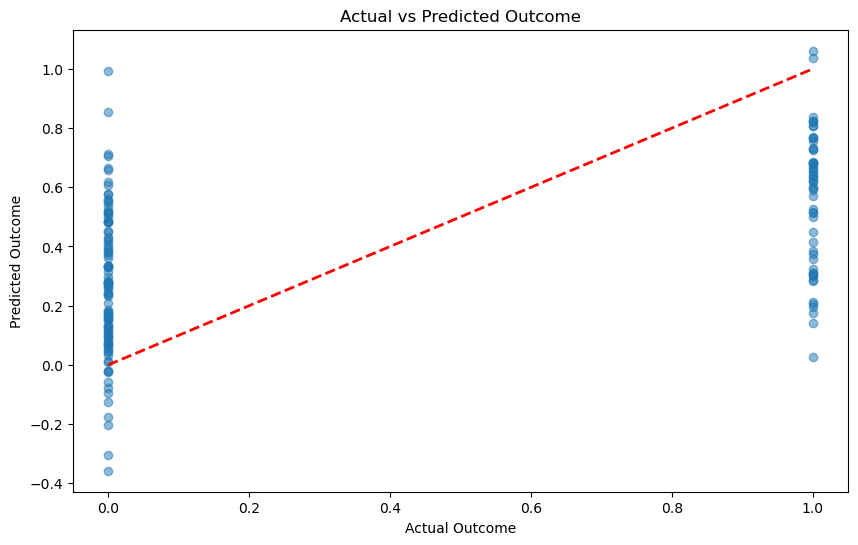

In [7]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--', lw=2)
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.title("Actual vs Predicted Outcome")
plt.show()


In [9]:
import numpy as np

# Sample patient features (replace these with actual values)
new_patient_features = {
    'Pregnancies': 2,
    'Glucose': 130,
    'BloodPressure': 70,
    'SkinThickness': 30,
    'Insulin': 100,
    'BMI': 28.0,
    'DiabetesPedigreeFunction': 0.5,
    'Age': 25
}

# Create a DataFrame for the new patient's features
new_patient_df = pd.DataFrame([new_patient_features])

# Predict the outcome for the new patient
new_patient_prediction = model.predict(new_patient_df)

# Apply threshold to get binary outcome
binary_prediction = 1 if new_patient_prediction[0] >= 0.5 else 0

print(f"Predicted Outcome: {binary_prediction}")


Predicted Outcome: 0
